__Introduction__

The objective of this project is to examine the effects of user engagement after seeing Ad A or Ad B

 

__Problem__

An advertising company has developed a new ad to have users engage with their questionnaire. The company has shown the new ad to some users and a dummy ad to others and wants their data analyst team to interpret the results. Does the new ad generate more responses to their questionnaire? Is it statistically significant? Is the company justified in using the new ad? 


__Data__

Dataset is found on kaggle from an advertising company. https://www.kaggle.com/osuolaleemmanuel/ad-ab-testing


__Columns Description__

auction_id: the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.

experiment: which group the user belongs to - control or exposed.

control: users who have been shown a dummy ad

exposed: users who have been shown a creative, an online interactive ad, with the SmartAd brand.

date: the date in YYYY-MM-DD format

hour: the hour of the day in HH format.

device_make: the name of the type of device the user has e.g. Samsung

platform_os: the id of the OS the user has.

browser: the name of the browser the user uses to see the BIO questionnaire.

yes: 1 if the user chooses the “Yes” radio button for the BIO questionnaire.

no: 1 if the user chooses the “No” radio button for the BIO questionnaire.




__Experiment Approach__

__Null Hypothesis Hₒ:__ p = pₒ "There is no significant difference between the ad success rate of both groups"

__Alternative Hypothesis Hₐ:__ p ≠ pₒ "There is significant difference between the ad success rate of both groups"

__Confidence Level:__ 95% (α=0.05)

_*we will perform a two-tailed test_

__Package & Data Imports__

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom
from scipy.stats import norm
import seaborn as sns

In [2]:
AdSmart=pd.read_csv("AdSmartABdata - AdSmartABdata.csv")
AdSmart

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [3]:
AdSmart.tail(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8067,ffc594ef-756c-4d24-a310-0d8eb4e11eb7,exposed,2020-07-05,1,Samsung SM-G950F,6,Chrome Mobile WebView,0,0
8068,ffc860d9-dece-4e24-92b2-3379fe7dc73d,control,2020-07-10,8,Samsung SM-A520F,6,Samsung Internet,0,0
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,Generic Smartphone,6,Chrome Mobile,0,1
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0
8076,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,2020-07-10,14,Samsung SM-G960F,6,Facebook,0,0


In [4]:
AdSmart.shape

(8077, 9)

In [5]:
AdSmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


__Data Preprocessing__

__Check for null values__

In [6]:
AdSmart.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

_*there is no null values_

__Check non-answer observations__ (both 'yes' and 'no' columns are equal to 0)

In [7]:
AdSmart_NoAns = AdSmart[(AdSmart['yes'] == 0) & (AdSmart['no'] == 0)]
AdSmart_NoAns

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


_*we will drop 6834 observations_

__Drop non-answer observations and assign to another variable__

In [8]:
AdSmart_AfterNoAns= AdSmart.drop(AdSmart_NoAns.index)

In [9]:
AdSmart_AfterNoAns.shape

(1243, 9)

_*only left with 1243 observations_

In [10]:
AdSmart_AfterNoAns.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


__Exploratory Data Analysis__

In [11]:
AdSmart_AfterNoAns['experiment'].value_counts()

exposed    657
control    586
Name: experiment, dtype: int64

In [12]:
Num_con= AdSmart_AfterNoAns.experiment.value_counts().control
Num_con

586

In [13]:
Num_exp= AdSmart_AfterNoAns.experiment.value_counts().exposed
Num_exp

657

In [14]:
Exper= AdSmart_AfterNoAns.groupby(['experiment']).sum()
Exper

,hour,platform_os,yes,no
experiment,,,,
control,7282,3503,264,322
exposed,7038,3938,308,349


In [15]:
Exper_YesNo= AdSmart_AfterNoAns.groupby('experiment')['yes','no'].sum()
Exper_YesNo

C:\Users\TT Z580\AppData\Local\Temp\ipykernel_30204\587089310.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Exper_YesNo= AdSmart_AfterNoAns.groupby('experiment')['yes','no'].sum()


,yes,no
experiment,,
control,264,322
exposed,308,349


In [16]:
Exper_Yes= AdSmart_AfterNoAns.groupby('experiment')['yes'].sum()
Exper_Yes

experiment
control    264
exposed    308
Name: yes, dtype: int64

In [17]:
Con_Yes=Exper_Yes.iloc[0]
Exp_Yes=Exper_Yes.iloc[1]
Con_Yes, Exp_Yes

(264, 308)

In [18]:
rate_con, rate_exp = Con_Yes/Num_con, Exp_Yes/Num_exp
print(rate_con)
print(rate_exp)

0.45051194539249145
0.4687975646879756


_Ad Success Control group 45.05%_

_Ad Success Exposed group 46.88%_

_Ad success is higher on the exposed group by __4%___

__Statistical Significance__

In [19]:
# Significance Level
alpha = 0.05

In [20]:
p_pooled_hat= (Con_Yes+Exp_Yes)/(Num_con+Num_exp)
p_pooled_hat

0.46017699115044247

In [21]:
pooled_variance= p_pooled_hat*(1-p_pooled_hat) * (1/Num_con + 1/Num_exp)
pooled_variance

0.0008020185896747209

In [22]:
# Standard Error
SE = np.sqrt(pooled_variance)
SE

0.028319932727228023

In [23]:
# test statsitics
Test_stat = (rate_con - rate_exp)/SE
Test_stat

-0.645680181221037

In [24]:
# critical value usig the standard normal distribution
Z_crit = norm.ppf(1-alpha/2)
Z_crit

1.959963984540054

In [25]:
# Margin of error
m = SE * Z_crit
m

0.055506048189964116

In [26]:
# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = norm.sf(Test_stat)*2
p_value

1.4815135017801033

In [27]:
# Confidence Interval
CI = [(rate_con-rate_exp) - SE * Z_crit, (rate_con-rate_exp) + SE * Z_crit]
CI

[-0.07379166748544828, 0.03722042889447995]

In [28]:
if np.abs(Test_stat) >= Z_crit:
    print("reject the null")
else:
    print("can not reject the null")
    print(p_value)

can not reject the null
1.4815135017801033


In [29]:
print("Test Statistics stat: ", Test_stat)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,6))

Test Statistics stat:  -0.645680181221037
Z-critical:  1.959963984540054
P_value:  1.4815135017801033
Confidence Interval of 2 sample Z-test for proportions:  [-0.073792  0.03722 ]


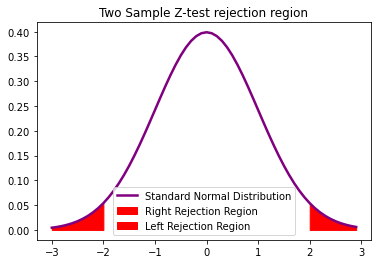

In [30]:
import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='r' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='r' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()

__Conclusion__

|Test_stat| < Z_crit (|-0.645680181221037| < 1.9599)

We can not reject the null hypothesis and conclude that there is no statistically significant difference between the AdA and AdB

These findings indicate that the new ad will yield no extra benefit.

There were many unanswered observations. This may be a lack of observations as we have removed these unanswered observations from the dataset.